## Purpose: Add Tax Features to the Ames House Price Dataset

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import datetime
import warnings

#### Load the Ames House Price Dataset

In [3]:
df_price = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0)
pd.set_option('display.max_columns', 20)
df_price.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


#### Load the Ames Real Estate Dataset

In [4]:
df_real_estate = pd.read_csv('data/Ames_Real_Estate_Data.csv')
pd.set_option('display.max_columns', 20)

/var/folders/jr/_gd99zyd2gg8ks3xkxshk6240000gn/T/ipykernel_92691/1213217882.py:1: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df_real_estate = pd.read_csv('data/Ames_Real_Estate_Data.csv')


In [5]:
df_real_estate = df_real_estate[[
'GeoRefNo',
'Prop_Addr',
'ClassPr_S',
'ClassSc_S',
'MA_Line1',
'MA_Line2',
'MA_City',
'MA_State',
'MA_Zip1',
'Rcrd_Yr',
'Rcrd_Mo',
'LndAc_S',
'OthAc_S',
'TtlVal_AsrYr',
'ValType',
'Neighborhood',
'LotArea',
'BldgType',
'YrBuilt',
'HouseStyle',
'Foundation',
'RoofMatl',
'Ext1',
'Ext2',
'MasVnrType',
'Heating',
'Central Air',
'GLA',
'TtlBsmtSF',
'TotRmsAbvGrd',
'Fireplaces',
'PoolArea',
'GarageType',
'GarYrBlt',
'Cars',
'GarageArea',
'YrSold_YYYY',
'MoSold_MM',
'SalePrice',
'SaleType',
'NmbrBRs']]

In [6]:
df_real_estate.head()

,GeoRefNo,Prop_Addr,ClassPr_S,ClassSc_S,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,Rcrd_Yr,...,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,NmbrBRs
0,520400001,4599 GEORGE W CARVER AVE,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,105 S 16TH ST,NaN,AMES,IA,50010.0,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,520440010,4507 EVEREST AVE,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,105 S 16TH ST,NaN,AMES,IA,50010.0,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,520440020,4513 EVEREST AVE,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,2575 N ANKENY BLVD STE 211,NaN,ANKENY,IA,50023.0,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,520445001,3449 BARCELOS ST,RESIDENTIAL,ASSOCIATION COMMON AREA,105 S 16TH ST,NaN,AMES,IA,50010.0,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,520445010,4506 EVEREST AVE,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,2575 N ANKENY BLVD STE 211,NaN,ANKENY,IA,50023.0,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_real_estate.shape

(22213, 41)

In [8]:
df_real_estate = df_real_estate[df_real_estate['MA_State']=='IA']

In [9]:
df_real_estate['GeoRefNo'].nunique()

18930

In [10]:
df_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19232 entries, 0 to 22212
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GeoRefNo      19232 non-null  int64  
 1   Prop_Addr     19217 non-null  object 
 2   ClassPr_S     19232 non-null  object 
 3   ClassSc_S     19232 non-null  object 
 4   MA_Line1      19232 non-null  object 
 5   MA_Line2      0 non-null      float64
 6   MA_City       19232 non-null  object 
 7   MA_State      19232 non-null  object 
 8   MA_Zip1       19232 non-null  float64
 9   Rcrd_Yr       17920 non-null  float64
 10  Rcrd_Mo       17920 non-null  float64
 11  LndAc_S       19232 non-null  int64  
 12  OthAc_S       19232 non-null  int64  
 13  TtlVal_AsrYr  19232 non-null  int64  
 14  ValType       19232 non-null  object 
 15  Neighborhood  15958 non-null  object 
 16  LotArea       15958 non-null  float64
 17  BldgType      15958 non-null  object 
 18  YrBuilt       15958 non-nu

#### There are duplicate rows in the real estate dataset, and the data contains records from other states. 

In [11]:
#print('SORTED DATAFRAME')
tmp=df_real_estate.sort_values(by = ['YrSold_YYYY', 
                            'MoSold_MM'], 
                      ascending = [False, False], na_position = 'first').drop_duplicates(['GeoRefNo',
'Prop_Addr',
'ClassPr_S',
'ClassSc_S',
'MA_Line1',
'MA_Line2',
'MA_City',
'MA_State',
'MA_Zip1',
'Rcrd_Yr',
'Rcrd_Mo',
'LndAc_S',
'OthAc_S',
'TtlVal_AsrYr',
'ValType',
'Neighborhood',
'LotArea',
'BldgType',
'YrBuilt',
'HouseStyle',
'Foundation',
'RoofMatl',
'Ext1',
'Ext2',
'MasVnrType',
'Heating',
'Central Air',
'GLA',
'TtlBsmtSF',
'TotRmsAbvGrd',
'Fireplaces',
'PoolArea',
'GarageType',
'GarYrBlt',
'Cars',
'GarageArea'])

In [12]:
tmp[tmp['GeoRefNo'] == 522105110]

,GeoRefNo,Prop_Addr,ClassPr_S,ClassSc_S,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,Rcrd_Yr,...,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,NmbrBRs
54,522105110,1711 LEDGES DR,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,1711 LEDGES DR,NaN,AMES,IA,50010.0,2019.0,...,0.0,Attachd,2018.0,3.0,642.0,2019.0,7.0,349900.0,NewSold,2.0


In [13]:
tmp[tmp['GeoRefNo'] == 902100120]

,GeoRefNo,Prop_Addr,ClassPr_S,ClassSc_S,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,Rcrd_Yr,...,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,NmbrBRs
7838,902100120,615 12TH ST 617,RESIDENTIAL,MULTIPLE DWELLINGS - REGARDLESS OF TYPE,1506 13TH ST,NaN,AMES,IA,50010.0,2009.0,...,0.0,Detachd,1982.0,3.0,845.0,NaN,NaN,NaN,NaN,3.0
7839,902100120,615 12TH ST 617,RESIDENTIAL,MULTIPLE DWELLINGS - REGARDLESS OF TYPE,1506 13TH ST,NaN,AMES,IA,50010.0,2009.0,...,0.0,Attachd,1910.0,1.0,378.0,NaN,NaN,NaN,NaN,1.0


In [14]:
tmp['GeoRefNo'].nunique()

18930

In [15]:
tmp.GeoRefNo.isna().sum()

0

In [16]:
tmp.shape

(18945, 41)

In [17]:
#find max value by team, sort descending
#group by team and calculate mean, sum, and standard deviation of points
tmp2=tmp.groupby(['GeoRefNo']).agg(
    GLA=('GLA', np.max),
    LotArea=('LotArea', np.max))

#tmp2.to_csv('tmp2.csv')

In [18]:
tmp2 = tmp2.reset_index()

In [19]:
tmp2.shape

(18930, 3)

In [20]:
df_real_estate = pd.merge(tmp, tmp2, how='inner')
df_real_estate.head()

,GeoRefNo,Prop_Addr,ClassPr_S,ClassSc_S,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,Rcrd_Yr,...,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,NmbrBRs
0,520400001,4599 GEORGE W CARVER AVE,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,105 S 16TH ST,NaN,AMES,IA,50010.0,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,520440010,4507 EVEREST AVE,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,105 S 16TH ST,NaN,AMES,IA,50010.0,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,520440020,4513 EVEREST AVE,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,2575 N ANKENY BLVD STE 211,NaN,ANKENY,IA,50023.0,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,520445001,3449 BARCELOS ST,RESIDENTIAL,ASSOCIATION COMMON AREA,105 S 16TH ST,NaN,AMES,IA,50010.0,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,520445010,4506 EVEREST AVE,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,2575 N ANKENY BLVD STE 211,NaN,ANKENY,IA,50023.0,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_real_estate.shape

(18928, 41)

In [22]:
df_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18928 entries, 0 to 18927
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GeoRefNo      18928 non-null  int64  
 1   Prop_Addr     18913 non-null  object 
 2   ClassPr_S     18928 non-null  object 
 3   ClassSc_S     18928 non-null  object 
 4   MA_Line1      18928 non-null  object 
 5   MA_Line2      0 non-null      float64
 6   MA_City       18928 non-null  object 
 7   MA_State      18928 non-null  object 
 8   MA_Zip1       18928 non-null  float64
 9   Rcrd_Yr       17616 non-null  float64
 10  Rcrd_Mo       17616 non-null  float64
 11  LndAc_S       18928 non-null  int64  
 12  OthAc_S       18928 non-null  int64  
 13  TtlVal_AsrYr  18928 non-null  int64  
 14  ValType       18928 non-null  object 
 15  Neighborhood  15655 non-null  object 
 16  LotArea       15655 non-null  float64
 17  BldgType      15655 non-null  object 
 18  YrBuilt       15655 non-nu

In [23]:
df_real_estate['GeoRefNo'].nunique()

18928

In [24]:
df_real_estate = df_real_estate.rename(columns={'MA_Zip1': 'zip_code', 'SalePrice': 'SalePrice2'})

In [25]:
df_real_estate.columns

Index(['GeoRefNo', 'Prop_Addr', 'ClassPr_S', 'ClassSc_S', 'MA_Line1',
       'MA_Line2', 'MA_City', 'MA_State', 'zip_code', 'Rcrd_Yr', 'Rcrd_Mo',
       'LndAc_S', 'OthAc_S', 'TtlVal_AsrYr', 'ValType', 'Neighborhood',
       'LotArea', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice2', 'SaleType', 'NmbrBRs'],
      dtype='object')

In [26]:
df_price.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [27]:
df_real_estate_features = df_real_estate[['GeoRefNo', 'zip_code', 'TtlVal_AsrYr',
       'GLA', 'SalePrice2', 'NmbrBRs']]

### There are same or similar columns in both price and real estate datasets, we do retain Assessment Values and Sales Price from the real estate dataset to validate the price dataset. We could use it for imputation and validation of predictions. The other two attributes are Gross Living Area and Number of Bedrooms

In [28]:
df_real_estate_features.head()

,GeoRefNo,zip_code,TtlVal_AsrYr,GLA,SalePrice2,NmbrBRs
0,520400001,50010.0,481100,NaN,NaN,NaN
1,520440010,50010.0,5700,NaN,NaN,NaN
2,520440020,50023.0,4400,NaN,NaN,NaN
3,520445001,50010.0,7100,NaN,NaN,NaN
4,520445010,50023.0,7200,NaN,NaN,NaN


In [29]:
df_price.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [30]:
df_price.shape

(2580, 81)

In [31]:
df_price.TotRmsAbvGrd.value_counts()

6     740
7     579
5     534
8     290
4     186
9     125
10     65
3      25
11     21
12     13
13      1
2       1
Name: TotRmsAbvGrd, dtype: int64

<AxesSubplot:>

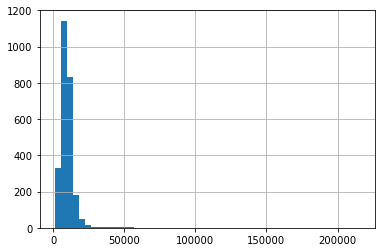

In [32]:
df_price.LotArea.hist(bins=50)

In [33]:
print(df_price.LotArea.max())
print(df_price.LotArea.median())
print(df_price.LotArea.mean())


215245
9391.0
10120.153488372092


In [34]:
pd.set_option('display.max_columns', None)
df_price[df_price['LotArea']>30000]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
105,906426195,1953,240000,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,985.0,Unf,0.0,595.0,1580.0,GasA,Ex,Y,SBrkr,1079,874,0,1.0,0.0,2,1,3,1,Gd,9,Typ,2,Fa,Attchd,1992.0,Fin,2.0,501.0,TA,TA,Y,216,231,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
187,903425190,2486,220000,50,RM,90.0,33120,Pave,NaN,IR3,Lvl,AllPub,Inside,Gtl,OldTown,RRAn,Feedr,1Fam,1.5Fin,6,5,1962,1962,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,TA,Y,SBrkr,1611,875,0,0.0,0.0,2,0,5,1,TA,8,Typ,1,Gd,Detchd,1962.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
196,905401060,1663,256000,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,1954,1994,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,1116.0,Unf,0.0,248.0,1364.0,GasA,Ex,Y,SBrkr,1663,0,0,1.0,0.0,1,0,2,1,Gd,6,Min1,2,Gd,Attchd,1954.0,Fin,2.0,529.0,TA,TA,Y,224,137,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
250,906426060,2144,277000,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal
310,908154205,4676,184750,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial
330,905425125,2358,240000,50,RL,75.0,45600,Pave,NaN,IR2,Bnk,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,6,8,1908,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,907.0,907.0,GasA,TA,Y,SBrkr,1307,1051,0,0.0,0.0,3,0,5,1,TA,10,Typ,1,Gd,Detchd,1908.0,Unf,2.0,360.0,Fa,TA,Y,486,40,0,0,175,0,NaN,NaN,NaN,0,9,2008,WD,Normal
348,533350050,1842,385000,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810.0,Unf,0.0,32.0,1842.0,GasA,Gd,Y,SBrkr,1842,0,0,2.0,0.0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3.0,894.0,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal
356,916176125,2036,375000,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236.0,Rec,820.0,80.0,2136.0,GasW,TA,Y,SBrkr,2036,0,0,2.0,0.0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2.0,513.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
370,923205025,1622,168000,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159.0,Unf,0.0,90.0,1249.0,GasA,Ex,Y,SBrkr,1622,0,0,1.0,0.0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4.0,1356.0,TA,TA,

#### Joining the price dataset with real estate dataset on PID and GeoRefNo

In [35]:
df_real_estate_features = pd.merge(df_price, df_real_estate_features, 
                                   how='left', 
                                   left_on=['PID'], right_on = ['GeoRefNo'])

In [36]:
df_real_estate_features.shape

(2580, 87)

In [37]:
df_real_estate_features.NmbrBRs.value_counts()

3.0    1383
2.0     629
4.0     333
1.0      93
5.0      35
6.0      18
0.0       8
Name: NmbrBRs, dtype: int64

### Tax Data
Source: https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2020-zip-code-data-soi
- The data was manually cleaned due to complexity of the file downloaded from IRS

In [38]:
df_tax = pd.read_csv('data/IA_taxes.csv')
df_tax.head()

,zip_code,total_returns,adj_gross_inc,business_returns,business_income,farming_return,unemp_returns,unemp_comp,ssn_returns,ssn_benefits,student_loans,student_loan_deduction,real_estate_returns,real_estate_taxes,child_credits,child_credit_amt,earned_inc_ret,earned_inc_tax
0,50001,310,23171,40,631,40,50,366,70,944,20,5,0,0,80,236,40,76
1,50002,620,39407,100,1237,100,130,1163,130,1751,60,38,0,0,140,338,90,205
2,50003,4310,463694,760,8747,190,650,6730,720,12918,570,445,450,2409,1430,4504,310,598
3,50005,330,16634,40,172,20,70,554,70,844,0,0,0,0,80,191,40,92
4,50006,740,45325,110,1050,90,80,902,130,1753,70,44,0,0,210,513,90,183


### Feature Engineering
Please refer to the data dictionary for rationale of these features

In [39]:
df_tax['agi_per_ret']=df_tax['adj_gross_inc']/df_tax['total_returns']

In [40]:
df_tax['perc_business_ret']=df_tax['business_income']/df_tax['adj_gross_inc']

In [41]:
df_tax['perc_farm_ret']=df_tax['farming_return']/df_tax['total_returns']

In [42]:
df_tax['perc_umemp_ret']=df_tax['unemp_returns']/df_tax['total_returns']

In [43]:
df_tax['perc_ssn_benefits']=df_tax['ssn_benefits']/df_tax['adj_gross_inc']

In [44]:
df_tax['perc_student_loans']=df_tax['student_loans']/df_tax['total_returns']

In [45]:
df_tax['perc_child_credits']=df_tax['child_credit_amt']/df_tax['adj_gross_inc']

In [46]:
df_tax['Perc_earned_inc_tax']=df_tax['earned_inc_tax']/df_tax['adj_gross_inc']

In [47]:
df_tax.head()

,zip_code,total_returns,adj_gross_inc,business_returns,business_income,farming_return,unemp_returns,unemp_comp,ssn_returns,ssn_benefits,student_loans,student_loan_deduction,real_estate_returns,real_estate_taxes,child_credits,child_credit_amt,earned_inc_ret,earned_inc_tax,agi_per_ret,perc_business_ret,perc_farm_ret,perc_umemp_ret,perc_ssn_benefits,perc_student_loans,perc_child_credits,Perc_earned_inc_tax
0,50001,310,23171,40,631,40,50,366,70,944,20,5,0,0,80,236,40,76,74.745161,0.027232,0.129032,0.161290,0.040741,0.064516,0.010185,0.003280
1,50002,620,39407,100,1237,100,130,1163,130,1751,60,38,0,0,140,338,90,205,63.559677,0.031390,0.161290,0.209677,0.044434,0.096774,0.008577,0.005202
2,50003,4310,463694,760,8747,190,650,6730,720,12918,570,445,450,2409,1430,4504,310,598,107.585615,0.018864,0.044084,0.150812,0.027859,0.132251,0.009713,0.001290
3,50005,330,16634,40,172,20,70,554,70,844,0,0,0,0,80,191,40,92,50.406061,0.010340,0.060606,0.212121,0.050739,0.000000,0.011483,0.005531
4,50006,740,45325,110,1050,90,80,902,130,1753,70,44,0,0,210,513,90,183,61.250000,0.023166,0.121622,0.108108,0.038676,0.094595,0.011318,0.004038


In [48]:
nan_values = df_tax.isna().any()
null_values = df_tax.isnull().any()

In [49]:
print(nan_values)

zip_code                  False
total_returns             False
adj_gross_inc             False
business_returns          False
business_income           False
farming_return            False
unemp_returns             False
unemp_comp                False
ssn_returns               False
ssn_benefits              False
student_loans             False
student_loan_deduction    False
real_estate_returns       False
real_estate_taxes         False
child_credits             False
child_credit_amt          False
earned_inc_ret            False
earned_inc_tax            False
agi_per_ret               False
perc_business_ret         False
perc_farm_ret             False
perc_umemp_ret            False
perc_ssn_benefits         False
perc_student_loans        False
perc_child_credits        False
Perc_earned_inc_tax       False
dtype: bool


In [50]:
print(null_values)

zip_code                  False
total_returns             False
adj_gross_inc             False
business_returns          False
business_income           False
farming_return            False
unemp_returns             False
unemp_comp                False
ssn_returns               False
ssn_benefits              False
student_loans             False
student_loan_deduction    False
real_estate_returns       False
real_estate_taxes         False
child_credits             False
child_credit_amt          False
earned_inc_ret            False
earned_inc_tax            False
agi_per_ret               False
perc_business_ret         False
perc_farm_ret             False
perc_umemp_ret            False
perc_ssn_benefits         False
perc_student_loans        False
perc_child_credits        False
Perc_earned_inc_tax       False
dtype: bool


In [51]:
df_tax.describe()

,zip_code,total_returns,adj_gross_inc,business_returns,business_income,farming_return,unemp_returns,unemp_comp,ssn_returns,ssn_benefits,student_loans,student_loan_deduction,real_estate_returns,real_estate_taxes,child_credits,child_credit_amt,earned_inc_ret,earned_inc_tax,agi_per_ret,perc_business_ret,perc_farm_ret,perc_umemp_ret,perc_ssn_benefits,perc_student_loans,perc_child_credits,Perc_earned_inc_tax
count,824.000000,824.000000,8.240000e+02,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,51309.944175,1807.087379,1.282747e+05,241.067961,2828.165049,85.145631,316.322816,3134.855583,320.521845,5052.111650,157.706311,112.084951,93.337379,542.338592,449.114078,1126.195388,227.293689,497.714806,65.043557,0.018369,0.123763,0.158954,0.045574,0.057905,0.009568,0.003808
std,1925.729362,3452.693212,2.670370e+05,428.304834,6102.363352,77.833534,644.486815,6760.679786,570.451928,9495.241594,344.980259,257.803687,254.455610,1718.364633,859.891099,2140.404839,502.512116,1129.151252,15.643303,0.015907,0.082302,0.058586,0.011569,0.043384,0.002286,0.002797
min,50001.000000,90.000000,4.411000e+03,0.000000,-31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.700000,-0.002008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50458.750000,270.000000,1.666175e+04,40.000000,175.250000,40.000000,40.000000,395.000000,50.000000,782.500000,0.000000,0.000000,0.000000,0.000000,60.000000,157.750000,30.000000,63.750000,56.094084,0.009350,0.060825,0.132021,0.039383,0.000000,0.008451,0.002102
50%,51053.500000,550.000000,3.480400e+04,85.000000,694.500000,60.000000,90.000000,811.500000,110.000000,1630.500000,40.000000,26.000000,0.000000,0.000000,140.000000,342.000000,60.000000,130.000000,62.001708,0.017893,0.121786,0.163265,0.046290,0.071429,0.009645,0.003548
75%,52181.500000,1340.000000,9.138650e+04,202.500000,2100.250000,110.000000,220.000000,1968.250000,270.000000,4059.750000,120.000000,78.000000,50.000000,233.500000,350.000000,916.500000,140.000000,303.250000,70.325958,0.024289,0.181818,0.194506,0.052416,0.090257,0.010901,0.005211
max,99999.000000,21020.000000,2.170245e+06,2980.000000,52730.000000,840.000000,4910.000000,50852.000000,3890.000000,71963.000000,3010.000000,2328.000000,2180.000000,15356.000000,6610.000000,19748.000000,3750.000000,8457.000000,199.568823,0.287785,0.444444,0.347826,0.085749,0.177817,0.017742,0.025510


In [52]:
df_tax.columns

Index(['zip_code', 'total_returns', 'adj_gross_inc', 'business_returns',
       'business_income', 'farming_return', 'unemp_returns', 'unemp_comp',
       'ssn_returns', 'ssn_benefits', 'student_loans',
       'student_loan_deduction', 'real_estate_returns', 'real_estate_taxes',
       'child_credits', 'child_credit_amt', 'earned_inc_ret', 'earned_inc_tax',
       'agi_per_ret', 'perc_business_ret', 'perc_farm_ret', 'perc_umemp_ret',
       'perc_ssn_benefits', 'perc_student_loans', 'perc_child_credits',
       'Perc_earned_inc_tax'],
      dtype='object')

In [53]:
df_tax_features = df_tax[['zip_code', 'total_returns', 'adj_gross_inc',
       'agi_per_ret', 'perc_business_ret', 'perc_farm_ret', 'perc_umemp_ret',
       'perc_ssn_benefits', 'perc_student_loans', 'perc_child_credits', 'Perc_earned_inc_tax']]

#### Joining real estate data with tax features, note that the join is based on Zip Code

In [54]:
tmp4 = pd.merge(df_real_estate_features, df_tax_features, how='left')

In [55]:
tmp4.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,zip_code,TtlVal_AsrYr,GLA,SalePrice2,NmbrBRs,total_returns,adj_gross_inc,agi_per_ret,perc_business_ret,perc_farm_ret,perc_umemp_ret,perc_ssn_benefits,perc_student_loans,perc_child_credits,Perc_earned_inc_tax
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,909176150.0,50010.0,149000.0,856.0,155000.0,2.0,14090.0,1036620.0,73.571327,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,905476230.0,50014.0,174100.0,1049.0,174400.0,2.0,11300.0,872772.0,77.236460,0.020427,0.013274,0.131858,0.036921,0.111504,0.006293,0.001735
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,911128020.0,50010.0,164300.0,1001.0,NaN,2.0,14090.0,1036620.0,73.571327,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,535377150.0,50010.0,124400.0,1039.0,139000.0,2.0,14090.0,1036620.0,73.571327,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,534177230.0,50010.0,257100.0,1665.0,245000.0,3.0,14090.0,1036620.0,73.571327,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166


In [56]:
tmp4.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [57]:
df_tax_features_PID = tmp4[['PID', 'zip_code', 'TtlVal_AsrYr',
       'GLA', 'SalePrice2', 'NmbrBRs', 'total_returns', 'adj_gross_inc',
       'agi_per_ret', 'perc_business_ret', 'perc_farm_ret', 'perc_umemp_ret',
       'perc_ssn_benefits', 'perc_student_loans', 'perc_child_credits', 'Perc_earned_inc_tax']]

In [58]:
df_tax_features_PID = tmp4[['PID', 'TtlVal_AsrYr', 'GLA',
                            'total_returns', 'adj_gross_inc', 'agi_per_ret', 'perc_business_ret',
                            'perc_farm_ret', 'perc_umemp_ret', 'perc_ssn_benefits', 'perc_student_loans',
                            'perc_child_credits', 'Perc_earned_inc_tax']]

In [59]:
df_tax_features_PID.shape

(2580, 13)

In [60]:
df_tax_features_PID.head()

,PID,TtlVal_AsrYr,GLA,total_returns,adj_gross_inc,agi_per_ret,perc_business_ret,perc_farm_ret,perc_umemp_ret,perc_ssn_benefits,perc_student_loans,perc_child_credits,Perc_earned_inc_tax
0,909176150,149000.0,856.0,14090.0,1036620.0,73.571327,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
1,905476230,174100.0,1049.0,11300.0,872772.0,77.236460,0.020427,0.013274,0.131858,0.036921,0.111504,0.006293,0.001735
2,911128020,164300.0,1001.0,14090.0,1036620.0,73.571327,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
3,535377150,124400.0,1039.0,14090.0,1036620.0,73.571327,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
4,534177230,257100.0,1665.0,14090.0,1036620.0,73.571327,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166


In [61]:
df_tax_features_PID.tail()

,PID,TtlVal_AsrYr,GLA,total_returns,adj_gross_inc,agi_per_ret,perc_business_ret,perc_farm_ret,perc_umemp_ret,perc_ssn_benefits,perc_student_loans,perc_child_credits,Perc_earned_inc_tax
2575,903205040,138500.0,952.0,14090.0,1036620.0,73.571327,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
2576,905402060,185100.0,1733.0,11300.0,872772.0,77.236460,0.020427,0.013274,0.131858,0.036921,0.111504,0.006293,0.001735
2577,909275030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2578,907192040,265200.0,1842.0,11300.0,872772.0,77.236460,0.020427,0.013274,0.131858,0.036921,0.111504,0.006293,0.001735
2579,906223180,250600.0,1911.0,11300.0,872772.0,77.236460,0.020427,0.013274,0.131858,0.036921,0.111504,0.006293,0.001735


In [62]:
df_tax_features_PID.isna().sum()

PID                     0
TtlVal_AsrYr           79
GLA                    81
total_returns          81
adj_gross_inc          81
agi_per_ret            81
perc_business_ret      81
perc_farm_ret          81
perc_umemp_ret         81
perc_ssn_benefits      81
perc_student_loans     81
perc_child_credits     81
Perc_earned_inc_tax    81
dtype: int64

In [63]:
df_tax_features_PID.columns

Index(['PID', 'TtlVal_AsrYr', 'GLA', 'total_returns', 'adj_gross_inc',
       'agi_per_ret', 'perc_business_ret', 'perc_farm_ret', 'perc_umemp_ret',
       'perc_ssn_benefits', 'perc_student_loans', 'perc_child_credits',
       'Perc_earned_inc_tax'],
      dtype='object')

In [64]:
#fill NaNs with calculated tax features mean values across all columns
df_tax_features_PID[['TtlVal_AsrYr', 'GLA',
                     'total_returns', 
                     'adj_gross_inc',
                     'agi_per_ret', 
                     'perc_business_ret', 
                     'perc_farm_ret', 
                     'perc_umemp_ret',
                     'perc_ssn_benefits', 
                     'perc_student_loans', 
                     'perc_child_credits',
                     'Perc_earned_inc_tax']] = df_tax_features_PID[['TtlVal_AsrYr', 'GLA','total_returns', 
                     'adj_gross_inc',
                     'agi_per_ret', 
                     'perc_business_ret', 
                     'perc_farm_ret', 
                     'perc_umemp_ret',
                     'perc_ssn_benefits', 
                     'perc_student_loans', 
                     'perc_child_credits',
                     'Perc_earned_inc_tax']].fillna(df_tax_features_PID[['TtlVal_AsrYr', 'GLA','total_returns',
                     'adj_gross_inc',
                     'agi_per_ret', 
                     'perc_business_ret', 
                     'perc_farm_ret', 
                     'perc_umemp_ret',
                     'perc_ssn_benefits', 
                     'perc_student_loans', 
                     'perc_child_credits',
                     'Perc_earned_inc_tax']].mean())



/var/folders/jr/_gd99zyd2gg8ks3xkxshk6240000gn/T/ipykernel_92691/3129377724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tax_features_PID[['TtlVal_AsrYr', 'GLA',


In [65]:
df_tax_features_PID.isna().sum()

PID                    0
TtlVal_AsrYr           0
GLA                    0
total_returns          0
adj_gross_inc          0
agi_per_ret            0
perc_business_ret      0
perc_farm_ret          0
perc_umemp_ret         0
perc_ssn_benefits      0
perc_student_loans     0
perc_child_credits     0
Perc_earned_inc_tax    0
dtype: int64

#### Data was also saved to a CSV file

In [66]:
df_tax_features_PID.to_csv('df_tax_features_PID.csv')

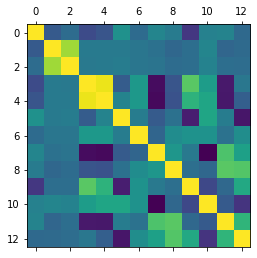

In [67]:
import matplotlib.pyplot as plt

plt.matshow(df_tax_features_PID.corr())
plt.show()

In [68]:
corr = df_tax_features_PID.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,PID,TtlVal_AsrYr,GLA,total_returns,adj_gross_inc,agi_per_ret,perc_business_ret,perc_farm_ret,perc_umemp_ret,perc_ssn_benefits,perc_student_loans,perc_child_credits,Perc_earned_inc_tax
PID,1.000000,-0.212033,-0.093674,-0.304390,-0.243334,0.167016,-0.095794,0.076864,0.012722,-0.416724,0.055829,0.067047,-0.112854
TtlVal_AsrYr,-0.212033,1.000000,0.756561,0.010314,0.009022,0.000115,-0.028487,-0.060571,-0.122602,-0.076748,0.077955,-0.132815,-0.103980
GLA,-0.093674,0.756561,1.000000,-0.008099,-0.001082,0.020043,-0.022576,-0.037960,-0.091159,-0.079286,0.062254,-0.080389,-0.085835
total_returns,-0.304390,0.010314,-0.008099,1.000000,0.950570,-0.197375,0.210398,-0.631044,-0.243616,0.566700,0.245231,-0.572209,-0.020992
adj_gross_inc,-0.243334,0.009022,-0.001082,0.950570,1.000000,0.067268,0.212211,-0.646072,-0.263750,0.401274,0.302960,-0.579973,-0.174278
agi_per_ret,0.167016,0.000115,0.020043,-0.197375,0.067268,1.000000,0.018639,-0.204775,-0.057454,-0.543833,0.303981,0.019013,-0.583740
perc_business_ret,-0.095794,-0.028487,-0.022576,0.210398,0.212211,0.018639,1.000000,-0.139373,0.134255,0.171943,0.170185,-0.055106,0.138703
perc_farm_ret,0.076864,-0.060571,-0.037960,-0.631044,-0.646072,-0.204775,-0.139373,1.000000,0.199507,-0.004786,-0.688217,0.530898,0.269310
perc_umemp_ret,0.012722,-0.122602,-0.091159,-0.243616,-0.263750,-0.057454,0.134255,0.199507,1.000000,-0.068911,-0.122641,0.569327,0.549298
perc_ssn_benefits,-0.416724,-0.076748,-0.079286,0.566700,0.401274,-0.543833,0.171943,-0.004786,-0.068911,1.000000,-0.323847,-0.118625,0.331943


In [69]:
tmp4.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

[Text(0.5, 1.0, 'House Style Boxplot')]

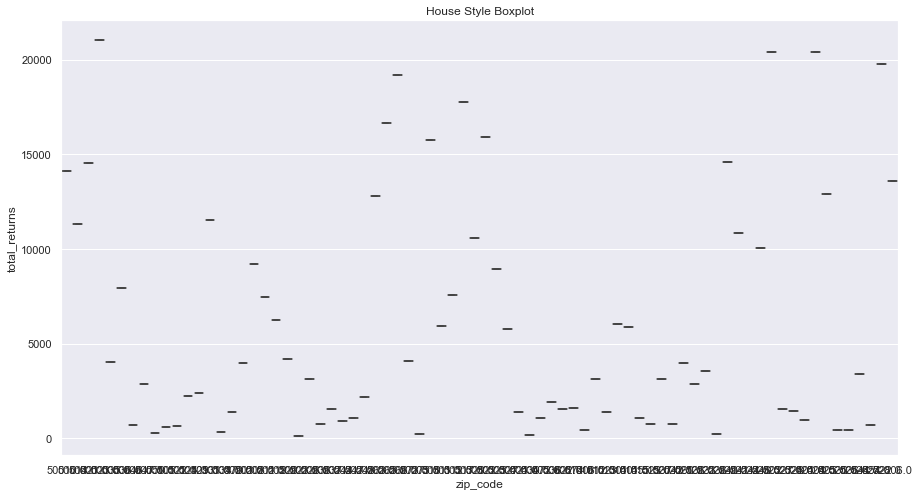

In [70]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='zip_code', y='total_returns', data=tmp4).set(title = "House Style Boxplot")

In [71]:
tmp4.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,zip_code,TtlVal_AsrYr,GLA,SalePrice2,NmbrBRs,total_returns,adj_gross_inc,agi_per_ret,perc_business_ret,perc_farm_ret,perc_umemp_ret,perc_ssn_benefits,perc_student_loans,perc_child_credits,Perc_earned_inc_tax
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,909176150.0,50010.0,149000.0,856.0,155000.0,2.0,14090.0,1036620.0,73.571327,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,905476230.0,50014.0,174100.0,1049.0,174400.0,2.0,11300.0,872772.0,77.236460,0.020427,0.013274,0.131858,0.036921,0.111504,0.006293,0.001735
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,911128020.0,50010.0,164300.0,1001.0,NaN,2.0,14090.0,1036620.0,73.571327,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,535377150.0,50010.0,124400.0,1039.0,139000.0,2.0,14090.0,1036620.0,73.571327,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,534177230.0,50010.0,257100.0,1665.0,245000.0,3.0,14090.0,1036620.0,73.571327,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166


In [72]:
tmp4.to_csv('tmp4.csv', index=False)